# 패키지로딩

In [54]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 하이퍼 파라미터 설정

In [55]:
EPOCH = 100
BATCH = 32

In [56]:
housing = fetch_california_housing()
rawDB = pd.DataFrame(housing.data,columns=housing.feature_names)
display(rawDB)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
x = rawDB.drop(['Latitude','Longitude'],axis=1)
y = housing.target

# 학습/평가 데이터 분리

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=10)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, random_state=10)
print('학습데이터 모양',x_train.shape, y_train.shape)
print('검증데이터 모양',x_valid.shape, y_valid.shape)
print('평가데이터 모양',x_test.shape, y_test.shape)

학습데이터 모양 (13209, 6) (13209,)
검증데이터 모양 (3303, 6) (3303,)
평가데이터 모양 (4128, 6) (4128,)


# 데이터 스케일링

In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

# 모델 생성 및 학습

In [60]:
model = Sequential()
model.add(Dense(units=30, activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1,activation='linear'))
print(model.summary())

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 30)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,411 (13.32 KB)

 Trainable params: 3,411 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
model.compile(optimizer='sgd',loss='mse',metrics = ['mae'])
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=BATCH,validation_data=(x_valid,y_valid),verbose=1) 

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1282 - mae: 0.7656 - val_loss: 0.8518 - val_mae: 0.5577
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5745 - mae: 0.5481 - val_loss: 0.4832 - val_mae: 0.5041
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4977 - mae: 0.5147 - val_loss: 0.4623 - val_mae: 0.4966
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4757 - mae: 0.5044 - val_loss: 0.4735 - val_mae: 0.4872
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4918 - mae: 0.5034 - val_loss: 0.4781 - val_mae: 0.4801
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4457 - mae: 0.4847 - val_loss: 0.4358 - val_mae: 0.4749
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4280 - mae: 0.4786 - val_loss: 0.4344 - val_mae: 0.4796
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4460 - mae: 0.4901 - val_loss: 0.4274 - val_mae: 0.4702
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

# 모델 평가

In [62]:
loss, mae = model.evaluate(x_test,y_test)
print(f'Test loss:{loss:.3f}')
print(f'Test MAE:{mae:.3f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3938 - mae: 0.4466
Test loss:0.404
Test MAE:0.448


In [63]:
from sklearn.metrics import r2_score
y_hat = model.predict(x_test)
print(f'R2 Score:{r2_score(y_test,y_hat):.3f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 Score:0.704


In [64]:
print(type(history))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(train_loss[:10])

<class 'keras.src.callbacks.history.History'>
[0.7800889015197754, 0.5461868047714233, 0.49558067321777344, 0.4723777770996094, 0.47933781147003174, 0.45212894678115845, 0.4426485002040863, 0.43767282366752625, 0.4350680708885193, 0.43146422505378723]


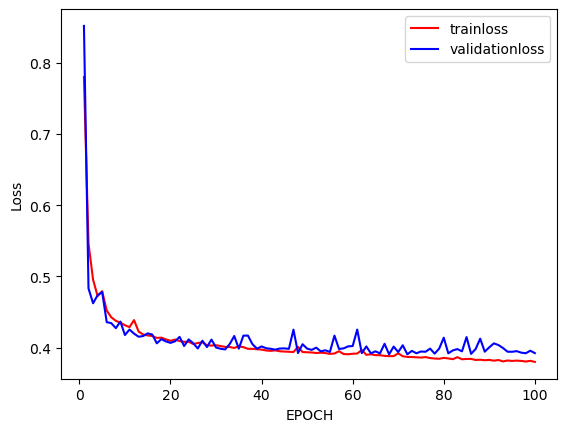

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(1,EPOCH+1),train_loss,color='r',label='trainloss')
plt.plot(range(1,EPOCH+1),val_loss,color='b',label='validationloss')
plt.xlabel('EPOCH')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 훈련
model.fit(X_train, Y_train, epochs=200, batch_size=1, verbose=1)